## Imports and Preparation for openPose
Allows for the OpenPose library to be run from a Jupyter Notebook. @author: Marc Bickel

In [1]:
#Imports and preparation for OpenPose

import sys
import cv2
import os
from sys import platform
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [15, 15]
%matplotlib inline


__file__ = os.path.realpath('C:/Users/Marku/Documents_no_sync/Projet_Bachelor/openpose/build/python/openpose/__init__.py')
sys.path.append(os.path.realpath('C:\\Users\\Marku\\Documents_no_sync\\Projet_Bachelor\\openpose\\build\\examples\\tutorial_api_python'))
dir_path = os.path.dirname(os.path.realpath(__file__))
if platform == "win32": sys.path.append(dir_path + '/../../python/openpose/');
else: sys.path.append('../../python');

try:
    from openpose import *
except:
    raise Exception('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
params = dict()
params["logging_level"] = 3
params["output_resolution"] = "-1x-1"
params["net_resolution"] = "-1x368"
params["model_pose"] = "BODY_25"
params["alpha_pose"] = 0.6
params["scale_gap"] = 0.3
params["scale_number"] = 1
params["render_threshold"] = 0.05
# If GPU version is built, and multiple GPUs are available, set the ID here
params["num_gpu_start"] = 0
params["disable_blending"] = False
# Ensure you point to the correct path where models are located
params["default_model_folder"] = dir_path + "/../../../models/"
# Construct OpenPose object allocates GPU memory
openpose = OpenPose(params)

print("Imports and start of openpose success !")

Imports and start of openpose success !


### Definition of the size of of the inline display for notebooks
Comment or modify if big inline display not wanted.

In [2]:
plt.rcParams["figure.figsize"] = [15, 15]

## Single image
Selection of the image, run openPose on it, convert it from openCV format to matplotlib format, show it with matplotlib. Save the image (in the same directory as this notebook) as necessary. 

(18, 25, 3)
[[[5.89342407e+02 1.25952774e+02 8.56808901e-01]
  [5.92759827e+02 1.46833878e+02 9.32111681e-01]
  [5.52745667e+02 1.46872894e+02 8.79589021e-01]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[1.34019202e+03 3.00219055e+02 8.87031794e-01]
  [1.31938623e+03 3.29796356e+02 8.45160782e-01]
  [1.27053723e+03 3.28001923e+02 7.71914303e-01]
  ...
  [1.27226892e+03 6.36446716e+02 1.21703021e-01]
  [1.26184412e+03 6.36446716e+02 1.27562299e-01]
  [1.27582800e+03 6.36436279e+02 2.81384438e-01]]

 [[1.12074719e+03 1.08498528e+02 9.13275599e-01]
  [1.11201721e+03 1.31099731e+02 8.68088365e-01]
  [1.07897559e+03 1.31092651e+02 8.75571132e-01]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 ...

 [[1.23391711e+03 2.04401596e+02 8.74521196e-01]
  [1.21480762e+03 2.1648284

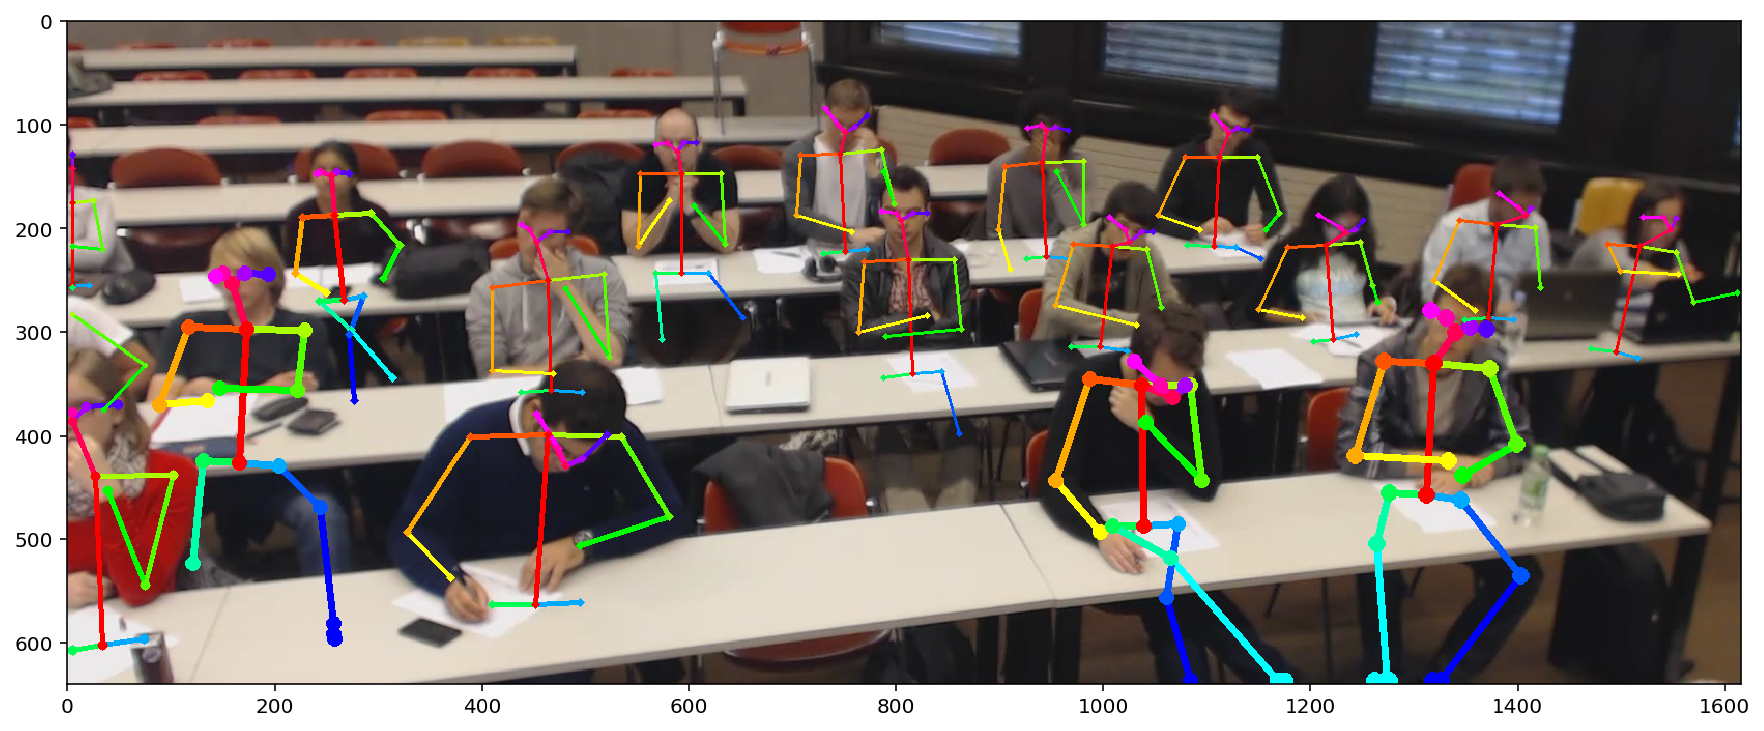

In [4]:
#image selection, processing, and display

# Read new image
# "../../../../../../Documents_no_sync/Projet_Bachelor/data/" == data of the project
img = cv2.imread("../../../../../../Documents_no_sync/Projet_Bachelor/data/03_131022_cscw_pierre_02/pictures_extracted/cam1/pierre02_06001.jpg")

# Output keypoints and the image with the human skeleton blended on it
keypoints, output_image = openpose.forward(img, True)

#conversion for plt to understand the encoding of the image
RGB_im = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

print(keypoints.shape)
print(keypoints)

# Display the image
plt.imshow(RGB_im)

#save the image as a file if needed
plt.savefig('prj_keypoints_classroom.jpg')

plt.show()

## Command line automatic sampling
Test for VLC automatic sampling of images (command line version) see [link](https://www.raymond.cc/blog/extract-video-frames-to-images-using-vlc-media-player/). Doesn't work in jupyter notebook because of the starting location of the IPython Kernel, but can be used from the command line directly.   
Or possible to do it in-app (VLC) directly. Needs to run the full length of the video though, but easier to do multiple times at the same time (still needs to be tested). 

## Try for multiple images display

### Try 1
Format the string to match the name of the images extracted from the video. 

In [ ]:
for i in range(1, 10):
    # Read new image
    # "../../../../../../" == C:\Users\Marku
    adress = '../../../../../../Pictures/test_video000{}.jpg'.format(30*i + 1)
    print(adress)
    img = cv2.imread(adress)

    # Output keypoints and the image with the human skeleton blended on it
    keypoints, output_image = openpose.forward(img, True)

    #conversion for plt to understand the encoding of the image
    RGB_im = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(RGB_im)
    
plt.show()

Fail, because the number of zeros in front of the actual changing number depends on the length of said number. Hence, a simple format will not work.

### Try 2
Iterate over the items in a directory.

C:\Users\Marku\Documents_no_sync\Projet_Bachelor\data\03_131022_cscw_pierre_02\pictures_extracted\cam4\pierre_0200001.jpg
C:\Users\Marku\Documents_no_sync\Projet_Bachelor\data\03_131022_cscw_pierre_02\pictures_extracted\cam4\pierre_0200151.jpg
C:\Users\Marku\Documents_no_sync\Projet_Bachelor\data\03_131022_cscw_pierre_02\pictures_extracted\cam4\pierre_0200301.jpg
C:\Users\Marku\Documents_no_sync\Projet_Bachelor\data\03_131022_cscw_pierre_02\pictures_extracted\cam4\pierre_0200451.jpg
C:\Users\Marku\Documents_no_sync\Projet_Bachelor\data\03_131022_cscw_pierre_02\pictures_extracted\cam4\pierre_0200601.jpg


KeyboardInterrupt: 

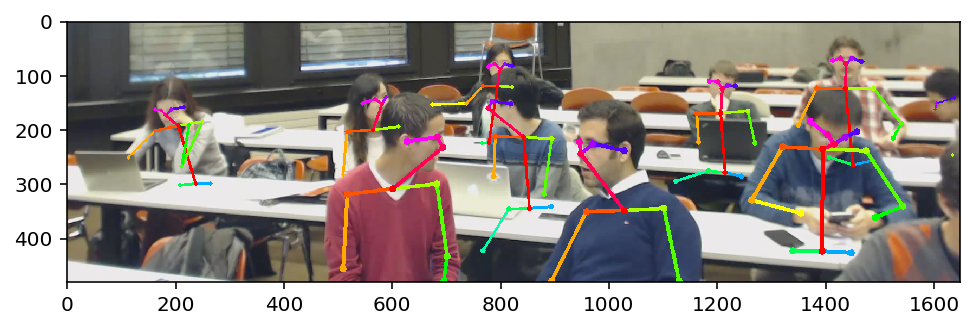

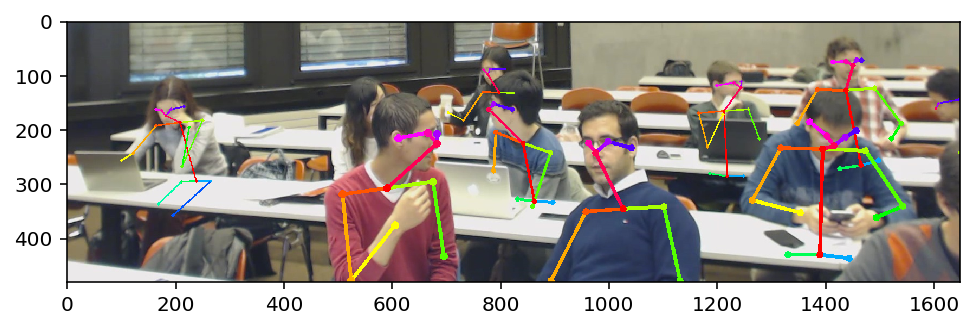

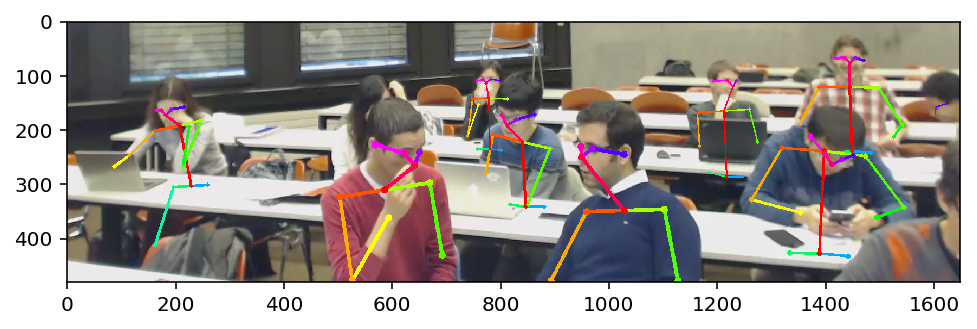

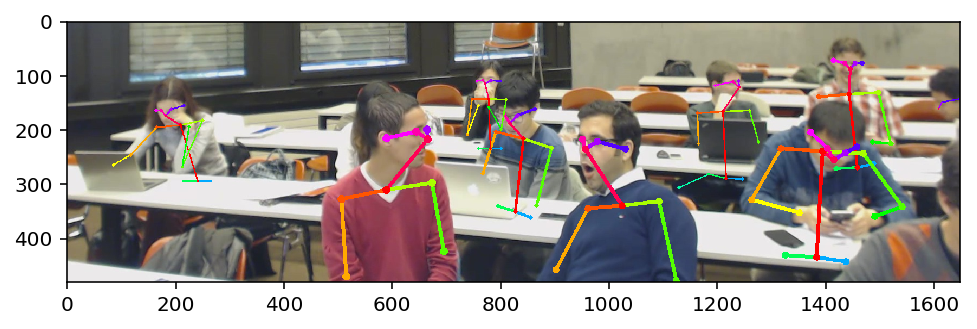

In [6]:
directory= os.path.realpath('C:/Users/Marku/Documents_no_sync/Projet_Bachelor/data/03_131022_cscw_pierre_02/pictures_extracted/cam4')

for file in os.listdir(directory):
    filename = os.path.join(directory, file)
    if filename.endswith("jpg"): 
        img = cv2.imread(filename)
        
        print(filename)

        # Output keypoints and the image with the human skeleton blended on it
        keypoints, output_image = openpose.forward(img, True)

        #conversion for plt to understand the encoding of the image
        RGB_im = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
        
        #fig.add_subplot(os.listdir(directory).size, 1, i)
        #i += 1
        
        plt.figure(figsize=(8, 8)) #size of the pictures
        plt.imshow(RGB_im)
        
        
#plt.show()

Done ! Allows for every picture in a folder to pass through openpose, and then be displayed. The printing of the name of the file currently being worked on could be removed to free some space. 